<a href="https://colab.research.google.com/github/shivaram7721/colab/blob/master/colab_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 479ms/step - accuracy: 0.2573 - loss: 1.1718 - val_accuracy: 0.2000 - val_loss: 1.1554
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.2671 - loss: 1.1544 - val_accuracy: 0.2333 - val_loss: 1.1318
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2990 - loss: 1.1222 - val_accuracy: 0.2000 - val_loss: 1.1089
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3133 - loss: 1.0972 - val_accuracy: 0.2333 - val_loss: 1.0862
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3187 - loss: 1.0677 - val_accuracy: 0.2667 - val_loss: 1.0633
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.3485 - loss: 1.0498 - val_accuracy: 0.3000 - val_loss: 1.0409
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3919 - loss: 1.0297 - val_accuracy: 0.3000 - val_loss: 1.0191
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4171 - loss: 1.0098 - val_accuracy: 0.3333 - val_loss: 0.998

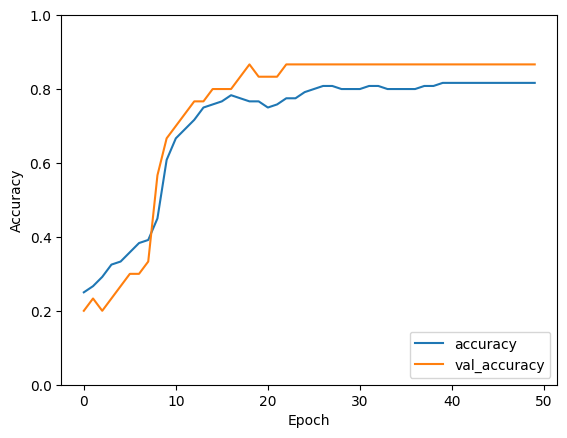

1/1 - 0s - 108ms/step - accuracy: 0.8667 - loss: 0.3990
Test accuracy: 0.87


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load a sample dataset
# For this example, we'll use the famous Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple neural network model
model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')
